<a href="https://colab.research.google.com/github/IsmailOtukoya/Banknote-Authentication-Model/blob/main/Airline_flight_delay_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
data = pd.read_csv(r'/content/flights-larger.csv')
data = data.sample(frac = 0.1, random_state = 42)
print(f"shape: {data.shape}")
data.head()

shape: (27500, 10)


,mon,dom,dow,carrier,flight,org,mile,depart,duration,delay
97191,6,29,2,UA,3,OGG,84,14.83,36,-3.0
126064,1,6,3,US,605,ORD,1515,15.33,244,NaN
151915,0,14,1,WN,873,SJC,621,15.17,105,-11.0
259977,0,31,4,AA,759,LGA,1389,16.33,250,69.0
55191,9,22,3,AA,2268,ORD,867,12.25,130,58.0


In [3]:
df = pd.DataFrame(data)
df

,mon,dom,dow,carrier,flight,org,mile,depart,duration,delay
97191,6,29,2,UA,3,OGG,84,14.83,36,-3.0
126064,1,6,3,US,605,ORD,1515,15.33,244,NaN
151915,0,14,1,WN,873,SJC,621,15.17,105,-11.0
259977,0,31,4,AA,759,LGA,1389,16.33,250,69.0
55191,9,22,3,AA,2268,ORD,867,12.25,130,58.0
...,...,...,...,...,...,...,...,...,...,...
192492,0,22,2,OO,5704,SJC,234,19.78,62,NaN
124253,9,6,1,UA,568,ORD,2072,8.40,291,-2.0
2718,1,12,2,AA,1872,ORD,1005,11.83,155,151.0
254539,9,31,5,UA,1567,ORD,1515,20.83,240,-26.0


In [4]:
df.info

<bound method DataFrame.info of         mon  dom  dow carrier  flight  org  mile  depart  duration  delay
97191     6   29    2      UA       3  OGG    84   14.83        36   -3.0
126064    1    6    3      US     605  ORD  1515   15.33       244    NaN
151915    0   14    1      WN     873  SJC   621   15.17       105  -11.0
259977    0   31    4      AA     759  LGA  1389   16.33       250   69.0
55191     9   22    3      AA    2268  ORD   867   12.25       130   58.0
...     ...  ...  ...     ...     ...  ...   ...     ...       ...    ...
192492    0   22    2      OO    5704  SJC   234   19.78        62    NaN
124253    9    6    1      UA     568  ORD  2072    8.40       291   -2.0
2718      1   12    2      AA    1872  ORD  1005   11.83       155  151.0
254539    9   31    5      UA    1567  ORD  1515   20.83       240  -26.0
61994     6   11    5      UA     597  ORD   334   20.08        82   79.0

[27500 rows x 10 columns]>

In [5]:
# Check missing value
df.isnull().sum().to_frame('NaN value').T

,mon,dom,dow,carrier,flight,org,mile,depart,duration,delay
NaN value,0,0,0,0,0,0,0,0,0,1606


In [6]:
# check for null values in each column
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())



delay    1606
dtype: int64


In [7]:
# check for null values in each row
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

        mon  dom  dow carrier  flight  org  mile  depart  duration  delay
126064    1    6    3      US     605  ORD  1515   15.33       244    NaN
149306    3   25    5      OO    5950  ORD   116   16.78        49    NaN
123916    0   29    2      AA     889  ORD  1745   18.25       270    NaN
132614    5   29    0      OH    5269  LGA   292   19.50       102    NaN
88822     2   31    1      OH    5251  LGA   544   14.75       134    NaN
...     ...  ...  ...     ...     ...  ...   ...     ...       ...    ...
87072     8   29    1      US     183  SMF   647    6.00       114    NaN
105967    1   28    4      US     425  SJC   621   12.73       111    NaN
219104    1   22    5      B6     625  JFK  1428   13.17       245    NaN
118612    7    5    2      AA    1067  ORD   925    9.67       155    NaN
192492    0   22    2      OO    5704  SJC   234   19.78        62    NaN

[1606 rows x 10 columns]


In [8]:
# filling  null values in 'delay' column with random integers between -30 and 170
#df['delay'].fillna(np.random.randint(-30, 171), inplace=True)


In [9]:
# Remove the 'flight' column
df =  df.drop('flight', axis = 1)

# Remove records with missing 'delay' values
#flights_valid_delay = flights_drop_column.filter('delay IS NOT NULL')

# Remove records with missing values 
df = df.dropna()
print(df.count())

mon         25894
dom         25894
dow         25894
carrier     25894
org         25894
mile        25894
depart      25894
duration    25894
delay       25894
dtype: int64


In [10]:
# check for null values in each column
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())


Series([], dtype: float64)


In [11]:
# check count of unique values in each columns
for col in df:
    print(f"{col}: {df[col].nunique()}")

mon: 12
dom: 31
dow: 7
carrier: 9
org: 8
mile: 317
depart: 999
duration: 394
delay: 428


In [12]:
# more details
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
mon,25894.0,5.252800,3.419211,0.00,2.0,5.0,8.0,11.00
dom,25894.0,15.681780,8.797041,1.00,8.0,16.0,23.0,31.00
dow,25894.0,2.969723,1.964170,0.00,1.0,3.0,5.0,6.00
mile,25894.0,891.419016,704.650054,67.00,358.0,678.0,1182.0,4243.00
depart,25894.0,14.076463,4.679170,0.25,10.0,14.0,18.0,23.98
duration,25894.0,152.713988,87.442866,30.00,85.0,125.0,195.0,560.00
delay,25894.0,28.701089,54.781896,-76.00,-6.0,16.0,44.0,942.00


In [13]:
df.describe(include=[object]).T

,count,unique,top,freq
carrier,25894,9,UA,6883
org,25894,8,ORD,9806


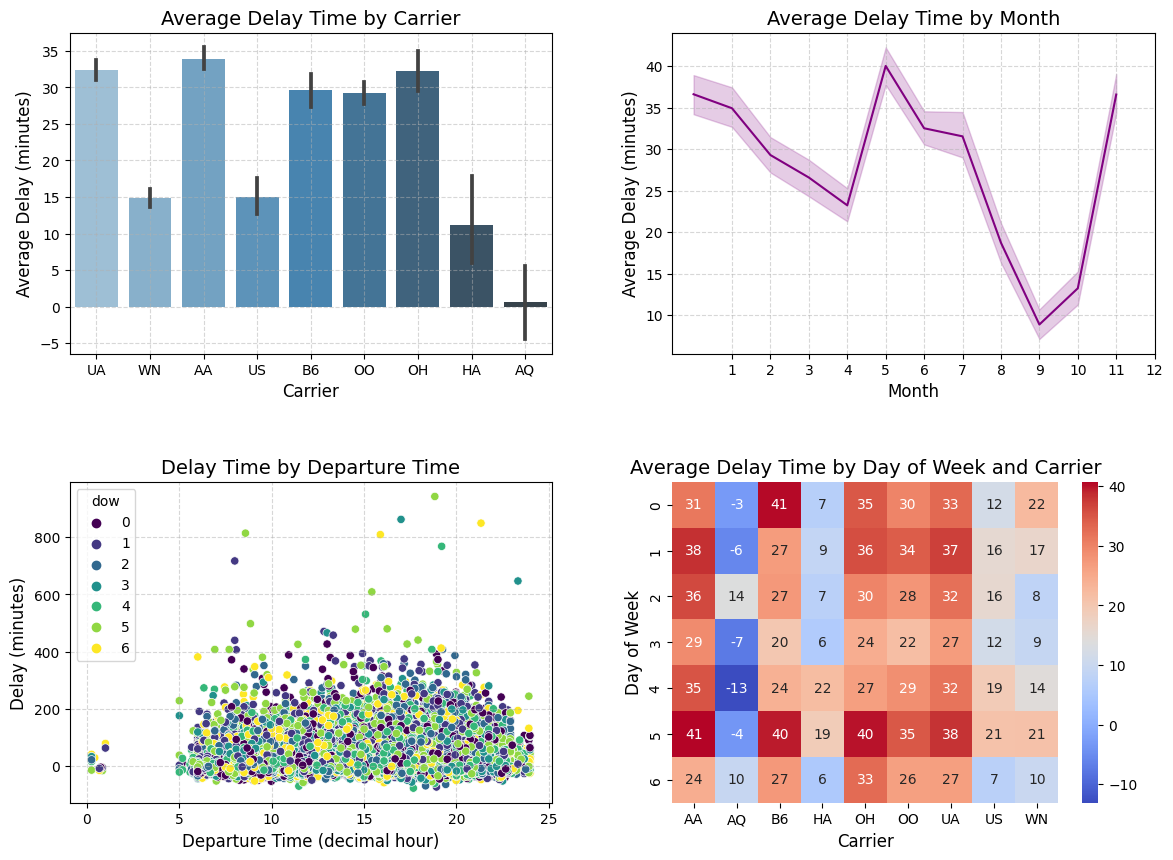

In [14]:
# Create a figure with subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(14,10))
plt.subplots_adjust(wspace=0.25, hspace=0.4) # Adjust spacing between subplots

# Subplot 1: Bar chart of average delay time by carrier
sns.barplot(x='carrier', y='delay', data=df, ax=axs[0,0], palette='Blues_d')
axs[0,0].set_xlabel('Carrier', fontsize=12)
axs[0,0].set_ylabel('Average Delay (minutes)', fontsize=12)
axs[0,0].set_title('Average Delay Time by Carrier', fontsize=14)
axs[0,0].tick_params(axis='both', labelsize=10)
axs[0,0].grid(True, alpha=0.5, linestyle='--')

# Subplot 2: Line chart of average delay time by month
sns.lineplot(x='mon', y='delay', data=df, ax=axs[0,1], color='purple')
axs[0,1].set_xlabel('Month', fontsize=12)
axs[0,1].set_ylabel('Average Delay (minutes)', fontsize=12)
axs[0,1].set_title('Average Delay Time by Month', fontsize=14)
axs[0,1].tick_params(axis='both', labelsize=10)
axs[0,1].set_xticks(range(1,13))
axs[0,1].grid(True, alpha=0.5, linestyle='--')

# Subplot 3: Scatterplot of delay time by departure time
sns.scatterplot(x='depart', y='delay', data=df, ax=axs[1,0], hue='dow', palette='viridis')
axs[1,0].set_xlabel('Departure Time (decimal hour)', fontsize=12)
axs[1,0].set_ylabel('Delay (minutes)', fontsize=12)
axs[1,0].set_title('Delay Time by Departure Time', fontsize=14)
axs[1,0].tick_params(axis='both', labelsize=10)
axs[1,0].grid(True, alpha=0.5, linestyle='--')

# Subplot 4: Heatmap of average delay time by day of week and carrier
carrier_delay = df.pivot_table(values='delay', index='dow', columns='carrier')
sns.heatmap(carrier_delay, cmap='coolwarm', ax=axs[1,1], annot=True, fmt=".0f")
axs[1,1].set_xlabel('Carrier', fontsize=12)
axs[1,1].set_ylabel('Day of Week', fontsize=12)
axs[1,1].set_title('Average Delay Time by Day of Week and Carrier', fontsize=14)
axs[1,1].tick_params(axis='both', labelsize=10)


In [15]:
# check for duplicates based on all columns
duplicate_rows = df[df.duplicated()]
# print the duplicate rows
print(duplicate_rows)








Empty DataFrame
Columns: [mon, dom, dow, carrier, org, mile, depart, duration, delay]
Index: []


In [16]:
corr_matrix = df.corr()


<ipython-input-16-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


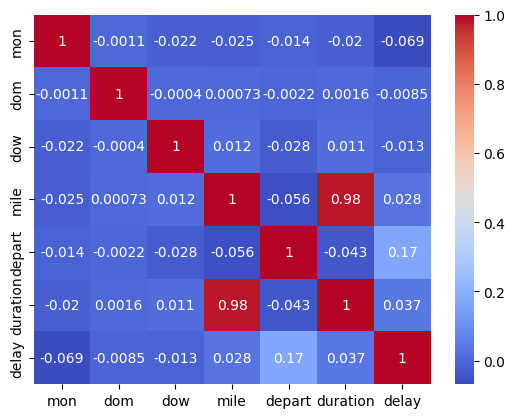

In [17]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [18]:
df.head()

,mon,dom,dow,carrier,org,mile,depart,duration,delay
97191,6,29,2,UA,OGG,84,14.83,36,-3.0
151915,0,14,1,WN,SJC,621,15.17,105,-11.0
259977,0,31,4,AA,LGA,1389,16.33,250,69.0
55191,9,22,3,AA,ORD,867,12.25,130,58.0
134805,7,22,5,AA,SJC,1829,13.33,250,51.0


In [19]:
#import plotly.graph_objects as go

#fig = go.Figure(df=[go.Scatter3d(x=df['depart'],
                                   #y=df['mon'],
                                   #z=df['org'],
                                   #mode='markers',
                                   #marker=dict(color=df['delay'], size=5))])

#fig.show()


In [20]:
# Convert columns 'mile' to 'km' and then drop it
# Convert miles to kilometers
df['km'] = df['mile'] * 1.60934

# Drop the miles column
df.drop('mile', axis=1, inplace=True)


# Create 'label' column indicating whether a flight is delayed or not
df['label'] = (df['delay'] >= 15).astype(int)

# Check first five records
df.head(5)


,mon,dom,dow,carrier,org,depart,duration,delay,km,label
97191,6,29,2,UA,OGG,14.83,36,-3.0,135.18456,0
151915,0,14,1,WN,SJC,15.17,105,-11.0,999.40014,0
259977,0,31,4,AA,LGA,16.33,250,69.0,2235.37326,1
55191,9,22,3,AA,ORD,12.25,130,58.0,1395.29778,1
134805,7,22,5,AA,SJC,13.33,250,51.0,2943.48286,1


In [21]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()
df['carrier_idx'] = le.fit_transform(df['carrier'])
df['org_idx'] = le.fit_transform(df['org'])

# Preview first five records
df.head()

,mon,dom,dow,carrier,org,depart,duration,delay,km,label,carrier_idx,org_idx
97191,6,29,2,UA,OGG,14.83,36,-3.0,135.18456,0,6,2
151915,0,14,1,WN,SJC,15.17,105,-11.0,999.40014,0,8,5
259977,0,31,4,AA,LGA,16.33,250,69.0,2235.37326,1,0,1
55191,9,22,3,AA,ORD,12.25,130,58.0,1395.29778,1,0,3
134805,7,22,5,AA,SJC,13.33,250,51.0,2943.48286,1,0,5


In [22]:
import pandas as pd

# create a new dataframe with the predictor variables
X = pd.concat([df['mon'], df['dom'], df['dow'], df['carrier_idx'], df['org_idx'], df['km'], df['depart'], df['duration']], axis=1)

# create a new dataframe with the target variable
y = df['delay']

# combine the predictor and target dataframes
df_flights= pd.concat([X, y], axis=1)

# rename the target column to 'label'
df_flights = df_flights.rename(columns={'delay': 'label'})

# check the resulting dataframe
print(df_flights.head())


        mon  dom  dow  carrier_idx  org_idx          km  depart  duration  \
97191     6   29    2            6        2   135.18456   14.83        36   
151915    0   14    1            8        5   999.40014   15.17       105   
259977    0   31    4            0        1  2235.37326   16.33       250   
55191     9   22    3            0        3  1395.29778   12.25       130   
134805    7   22    5            0        5  2943.48286   13.33       250   

        label  
97191    -3.0  
151915  -11.0  
259977   69.0  
55191    58.0  
134805   51.0  


In [23]:
#sseperating the label variable from the feature column
#y = df_flights['label'] 
#X = df_flights.drop('label', axis = 1)
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

In [24]:
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(X)

In [25]:
#pca = PCA(n_components = 2)
#X_pca = pca.fit_transform(scaled_data)


# Machine Learning Models


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_flights.drop('label',axis = 1), df['label'], test_size=0.3, random_state=42)

# Define the machine learning models to train
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Neural Network', MLPClassifier(random_state=42))
    
]
#model = ('Random Forest', RandomForestClassifier(random_state=42))
# Train and evaluate each model
results = []
for name, model in models:
    print('Training', name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    (name, 'accuracy:', accuracy)
    (name, 'precision:', precision)
    (name, 'recall:', recall)
    (name, 'F1 score:', f1) 
    results.append((name, accuracy, precision, recall, f1))

    #Create a DataFrame from the results and print it out
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    print(df_results)

Training Random Forest
           Model  Accuracy  Precision   Recall  F1 Score
0  Random Forest  0.659802   0.654478  0.67722  0.665655
Training Gradient Boosting
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.659802   0.654478  0.677220  0.665655
1  Gradient Boosting  0.659544   0.645882  0.706564  0.674862
Training SVM
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.659802   0.654478  0.677220  0.665655
1  Gradient Boosting  0.659544   0.645882  0.706564  0.674862
2                SVM  0.549105   0.542463  0.628057  0.582131
Training KNN
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.659802   0.654478  0.677220  0.665655
1  Gradient Boosting  0.659544   0.645882  0.706564  0.674862
2                SVM  0.549105   0.542463  0.628057  0.582131
3                KNN  0.577809   0.573121  0.610296  0.591124
Training Neural Network
               Model  Accuracy  Precision 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [3, 5]
}

gb = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)


In [28]:
y = df_flights['label'] 
X = df_flights.drop('label', axis = 1)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=500)

# Fit the classifier on the entire dataset
gb_clf.fit(X,y)

# Make predictions on the entire dataset
y_pred = gb_clf.predict(X)

# Print the classification report
print(classification_report(y, y_pred))


KeyboardInterrupt: ignored